# 11 - Project // Feature Scalling

https://github.com/ad3rinto/data-science-rune/blob/main/11%20-%20Project%20-%20Feature%20Scaling.ipynb

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_parquet('https://github.com/ad3rinto/data-science-rune/raw/refs/heads/main/files/soccer.parquet')
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accuracy   1

In [ ]:
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking                 True
standing_tackl

In [ ]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [ ]:
data = data.dropna()

In [ ]:
data = data.iloc[:2000]
len(data)

2000

**Analyze**

---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2043
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   2000 non-null   int64  
 1   player_api_id        2000 non-null   int64  
 2   date                 2000 non-null   object 
 3   overall_rating       2000 non-null   float64
 4   potential            2000 non-null   float64
 5   preferred_foot       2000 non-null   object 
 6   attacking_work_rate  2000 non-null   object 
 7   defensive_work_rate  2000 non-null   object 
 8   crossing             2000 non-null   float64
 9   finishing            2000 non-null   float64
 10  heading_accuracy     2000 non-null   float64
 11  short_passing        2000 non-null   float64
 12  volleys              2000 non-null   float64
 13  dribbling            2000 non-null   float64
 14  curve                2000 non-null   float64
 15  free_kick_accuracy   2000 non-null   float6

In [ ]:
X = data.drop(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], axis=1)
y = data['preferred_foot']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Normalized Data

In [ ]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Standardize Data

In [ ]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

Compare Sets

---



In [ ]:
score = []

X_trains = [X_train, X_train_norm, X_train_stand]
X_tests = [X_test, X_test_norm, X_test_stand]

In [ ]:
for X_train_set, X_test_set in zip(X_trains, X_tests):
  svc = SVC()
  svc.fit(X_train_set, y_train)
  y_pred = svc.predict(X_test_set)
  score.append(accuracy_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score': score}, index=['Original', 'Normalized', 'Standardized'])

,score
Original,0.768
Normalized,0.928
Standardized,0.954


**Finding Most Important Features**

---



In [ ]:
svc = SVC()
svc.fit(X_train_stand, y_train)

perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean

array([ 0.0124,  0.0072,  0.0016,  0.0052,  0.0184,  0.002 ,  0.022 ,
        0.0048,  0.0504,  0.0036,  0.0268,  0.0048,  0.042 ,  0.0176,
        0.0044,  0.0072,  0.0064,  0.0056,  0.0016,  0.014 ,  0.0016,
        0.0096,  0.0528,  0.0044,  0.0192,  0.014 ,  0.0188,  0.0128,
        0.0084, -0.0036,  0.0068, -0.0096,  0.004 ,  0.004 ,  0.0176,
        0.0088,  0.01  ])

<Axes: >

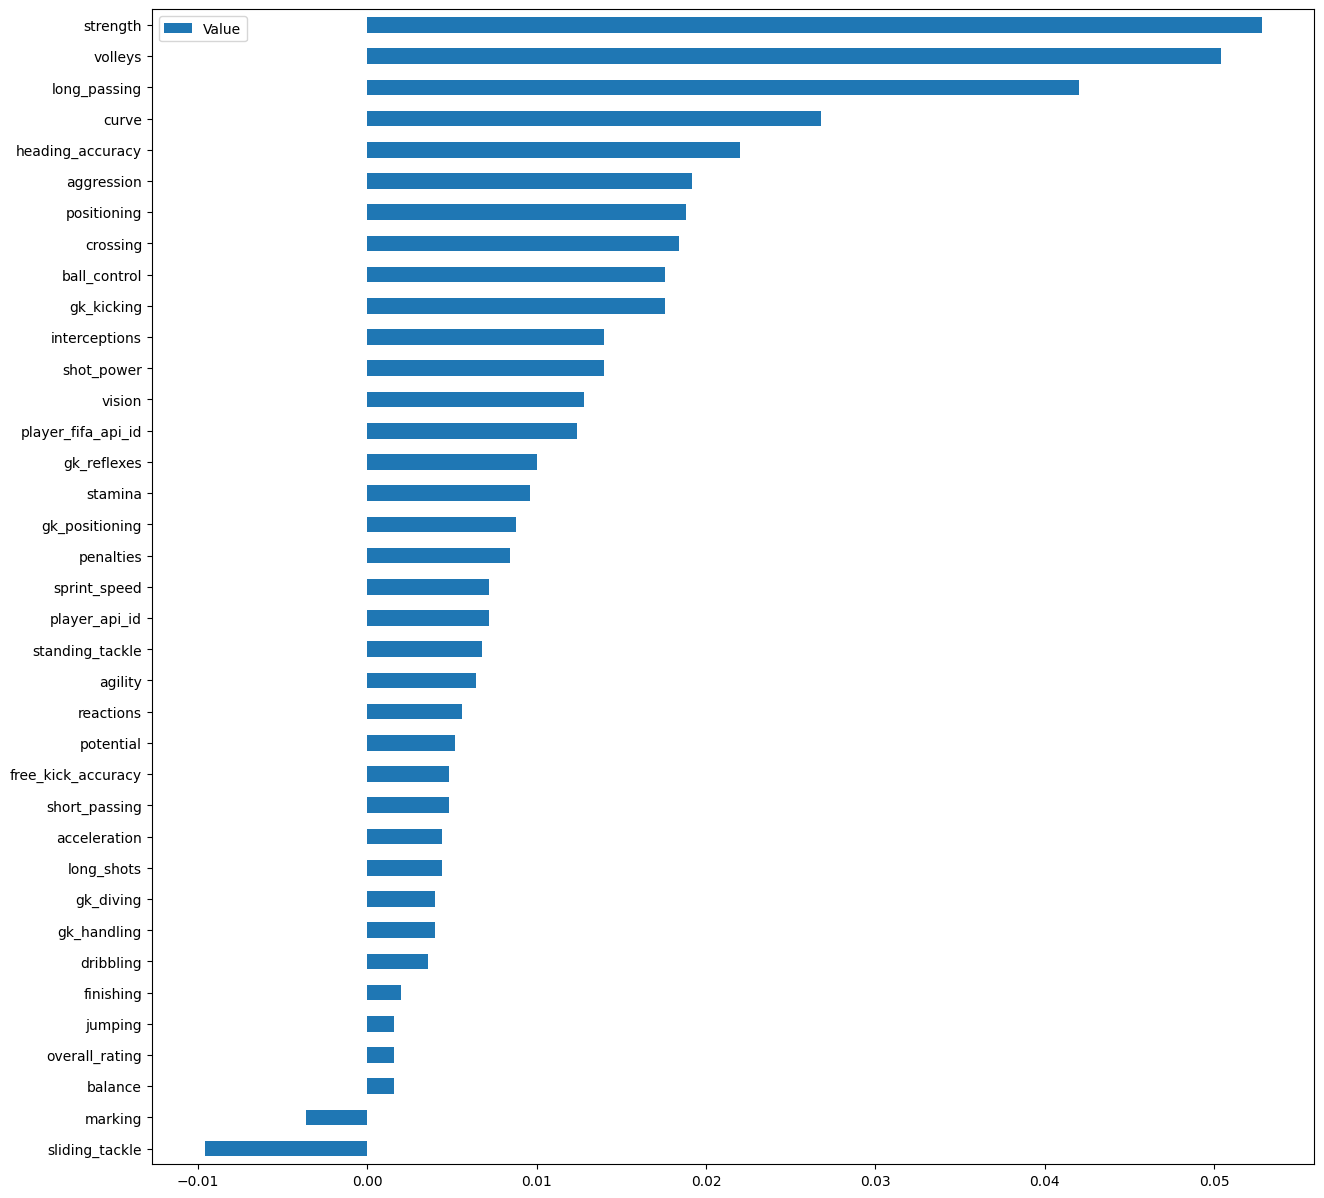

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh(figsize=(15,15))